# Task1: prediction using supervised ML

AIM: Predict the percentage of an student based on the no. of study hours 

# Author- Atul Kumar

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [2]:
#reading data
data=pd.read_excel("Book1.xlsx")

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.isnull == True

False

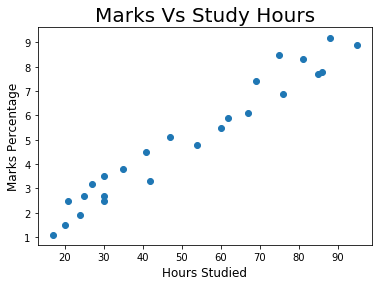

In [5]:
plt.scatter( data['Scores'], data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Splitting train and test data

In [6]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,random_state=0)

## Training the model

In [7]:
regression = LinearRegression()
regression.fit(X_train, Y_train)
print("---------Model Trained---------")

---------Model Trained---------


### Fitting the data into model

In [8]:
pred_y = regression.predict(X_val)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_val], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### Comparing actual and predicted dataset

In [9]:
compare_scores = pd.DataFrame({'Actual Marks': Y_val, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Calculating error

In [10]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(Y_val,pred_y))

Mean absolute error:  4.130879918502486


### What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [11]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893
